# 어텐션(Attention)

### 맥락 벡터 : 단어 벡터에 가중치를 를 곱하여 합한 가중합을 구한 벡터
단어를 선택하는 작업은 미분 불가하므로 모든 것을 선택하고 단어의 중요도를 가중치로 계산

In [1]:
import numpy as np
np.random.seed(100)

T, H = 5, 4                # T : 시계열의 길이, H : Hidden size
hs = np.random.randn(T, H) # (5,4)
print('hs:\n',hs)
print('hs0:',hs[0])

a  = np.array([0.8, 0.1, 0.03, 0.05, 0.02]) # 가중치
print('a:\n',a)

# (1) repeat() 함수 사용
ar = a.reshape(T, 1).repeat(4, axis=1) # (5,1)로 2차원으로 shape을 바꾸고 수평 방향으로 4번 반복 복사
print('ar:\n',ar)
print(ar.shape)      # (5,4)

t = hs * ar          # (5,4) * (5,4) : 요소간의 곱셈, 단어벡터에 가중치를 곱함
print('t:\n',t)
print(t.shape)       # (5,4)

# (2) Numpy 브로드캐스팅 사용, 1번과 결과 동일 
ar = a.reshape(T, 1) # (5,1)로 2차원으로 shape을 바꿈
print('ar:\n',ar)
print(ar.shape)      # (5,1)

t = hs * ar          # (5,4) * (5,1) : 브로드캐스팅 적용, , 단어벡터에 가중치를 곱함
print('t:\n',t)
print(t.shape)       # (5,4)


c = np.sum(t, axis=0) # 수직 방햡으로 합 , 가중합, 맥락 벡터
print('c  :',c)       # [-1.34717053  0.39465326  0.95567913 -0.32348518], hs0와 거의 비슷한 값들로 hs0을 선택한 효과
print('hs0:',hs[0])   # [-1.74976547  0.3426804   1.1530358  -0.25243604]
print(c.shape)        # (4,)

hs:
 [[-1.74976547  0.3426804   1.1530358  -0.25243604]
 [ 0.98132079  0.51421884  0.22117967 -1.07004333]
 [-0.18949583  0.25500144 -0.45802699  0.43516349]
 [-0.58359505  0.81684707  0.67272081 -0.10441114]
 [-0.53128038  1.02973269 -0.43813562 -1.11831825]]
hs0: [-1.74976547  0.3426804   1.1530358  -0.25243604]
a:
 [0.8  0.1  0.03 0.05 0.02]
ar:
 [[0.8  0.8  0.8  0.8 ]
 [0.1  0.1  0.1  0.1 ]
 [0.03 0.03 0.03 0.03]
 [0.05 0.05 0.05 0.05]
 [0.02 0.02 0.02 0.02]]
(5, 4)
t:
 [[-1.39981238  0.27414432  0.92242864 -0.20194883]
 [ 0.09813208  0.05142188  0.02211797 -0.10700433]
 [-0.00568487  0.00765004 -0.01374081  0.0130549 ]
 [-0.02917975  0.04084235  0.03363604 -0.00522056]
 [-0.01062561  0.02059465 -0.00876271 -0.02236636]]
(5, 4)
ar:
 [[0.8 ]
 [0.1 ]
 [0.03]
 [0.05]
 [0.02]]
(5, 1)
t:
 [[-1.39981238  0.27414432  0.92242864 -0.20194883]
 [ 0.09813208  0.05142188  0.02211797 -0.10700433]
 [-0.00568487  0.00765004 -0.01374081  0.0130549 ]
 [-0.02917975  0.04084235  0.03363604 -0.0052205

In [2]:
# 3차원 배열의 가중합의 구현, 맥락 벡터
np.random.seed(100)

N, T, H = 10, 5, 4      # 면,행,열
hs = np.random.randn(N, T, H)
# print('hs:\n',hs)

np.random.seed(100)
a  = np.random.randn(N, T)  # 가중치의 합이 1이 아닌 예임
print('a:\n',a)

ar = a.reshape(N, T, 1).repeat(H, axis=2)  # 2번축(열)로 4번 반복
# print('ar:\n',ar)

t = hs * ar  # (10,5, 4)
# print('t:\n',t)
print(t.shape)

c = np.sum(t, axis=1)  # 1번 축(행)으로 합 
print('c:\n',c)
print(c.shape)

a:
 [[-1.74976547  0.3426804   1.1530358  -0.25243604  0.98132079]
 [ 0.51421884  0.22117967 -1.07004333 -0.18949583  0.25500144]
 [-0.45802699  0.43516349 -0.58359505  0.81684707  0.67272081]
 [-0.10441114 -0.53128038  1.02973269 -0.43813562 -1.11831825]
 [ 1.61898166  1.54160517 -0.25187914 -0.84243574  0.18451869]
 [ 0.9370822   0.73100034  1.36155613 -0.32623806  0.05567601]
 [ 0.22239961 -1.443217   -0.75635231  0.81645401  0.75044476]
 [-0.45594693  1.18962227 -1.69061683 -1.35639905 -1.23243451]
 [-0.54443916 -0.66817174  0.00731456 -0.61293874  1.29974807]
 [-1.73309562 -0.9833101   0.35750775 -1.6135785   1.47071387]]
(10, 5, 4)
c:
 [[ 2.80542708  0.67492463 -3.06964038 -0.49429174]
 [ 1.66909252  0.35458585 -0.69390567  1.18438439]
 [ 0.40873493 -1.14219042  0.29743893  0.57340786]
 [ 1.32456655  0.84165295 -3.78716073  1.46092809]
 [ 0.86880452  2.39259227 -3.51633402  0.95428607]
 [-1.12067803 -1.99278502 -4.444337    0.584148  ]
 [-0.74776957  2.80149671 -0.98071568  0.881

#### 가중합 WeightSum 계층 구현 : 맥락벡터를 구하는 계층

In [3]:
# 가중합을 구하는 class
class WeightSum:
    def __init__(self):
        self.params, self.grads = [], []    # 학습 매개변수가 없는 계층
        self.cache = None

    def forward(self, hs, a):
        N, T, H = hs.shape

        ar = a.reshape(N, T, 1)#.repeat(T, axis=2)  # repeat노드이지만 repeat 사용하지 않아도 아래 연산시 브로드캐스팅 적용
        t = hs * ar
        c = np.sum(t, axis=1)

        self.cache = (hs, ar)
        return c

    def backward(self, dc):
        hs, ar = self.cache
        N, T, H = hs.shape
        dt = dc.reshape(N, 1, H).repeat(T, axis=1)   # sum의 역전파, 출력: (N,T,H)
        dar = dt * hs              # (N,T,H)
        dhs = dt * ar              # (N,T,H)
        da = np.sum(dar, axis=2)   # repeat의 역전파, 출력 :(N,T)

        return dhs, da

### 가중치를 구하는 AttentionWeight 계츨 구현: 각 단어의 가중치를 구하여 WeightSum 계층으로 전달한다

In [4]:
# 가중치 a를 softmax를 사용하여 구하기
from nn_layers import softmax, Softmax

# nn_layers.py에 아래 Softmax class추가
# class Softmax:
#     def __init__(self):
#         self.params, self.grads = [], []
#         self.out = None

#     def forward(self, x):
#         self.out = softmax(x)
#         return self.out

#     def backward(self, dout):
#         dx = self.out * dout
#         sumdx = np.sum(dx, axis=1, keepdims=True)
#         dx -= self.out * sumdx
#         return dx
    

N, T, H = 10, 5, 4
hs = np.random.randn(N, T, H)
h  = np.random.randn(N, H)

hr = h.reshape(N, 1, H).repeat(T, axis=1)

t = hs * hr
print(t.shape)

s = np.sum(t, axis=2)
print(s.shape)

soft_max = Softmax()
a = soft_max.forward(s)
print(a.shape)
print(a.sum(axis=1))
a

(10, 5, 4)
(10, 5)
(10, 5)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


array([[5.63237728e-02, 1.04074747e-01, 4.23898297e-02, 1.47263871e-02,
        7.82485264e-01],
       [5.53701119e-02, 4.80393607e-01, 4.28061671e-02, 3.85876280e-01,
        3.55538343e-02],
       [5.37232895e-01, 6.98477895e-02, 4.44402175e-04, 9.67496319e-02,
        2.95725282e-01],
       [3.24050464e-02, 5.02709985e-02, 4.97054170e-01, 3.28378373e-02,
        3.87431948e-01],
       [3.36591822e-01, 4.58411180e-01, 1.03496382e-01, 2.85307897e-02,
        7.29698253e-02],
       [1.82470330e-01, 9.78834511e-02, 1.99107850e-01, 7.72720129e-02,
        4.43266356e-01],
       [2.58204641e-02, 8.21234188e-01, 1.20320474e-01, 9.09933568e-03,
        2.35255380e-02],
       [8.85812519e-01, 5.38405842e-02, 6.86739426e-04, 5.93412575e-02,
        3.18900080e-04],
       [2.49319114e-01, 5.12235905e-02, 1.76418517e-01, 5.07457537e-01,
        1.55812418e-02],
       [6.87386323e-01, 5.71919256e-02, 1.08711149e-01, 6.24206201e-02,
        8.42899822e-02]])

In [5]:
# 각단어의 가중치를 구하는 class
class AttentionWeight:
    def __init__(self):
        self.params, self.grads = [], []
        self.softmax = Softmax()
        self.cache = None

    def forward(self, hs, h):
        N, T, H = hs.shape

        hr = h.reshape(N, 1, H)#.repeat(T, axis=1)  # repeat를 사용하지 않아도 아래 곱셈에서 브로드캐스팅으로 repeat
        t = hs * hr
        s = np.sum(t, axis=2)
        a = self.softmax.forward(s)

        self.cache = (hs, hr)
        return a

    def backward(self, da):
        hs, hr = self.cache
        N, T, H = hs.shape

        ds = self.softmax.backward(da)              # (N,T)
        dt = ds.reshape(N, T, 1).repeat(H, axis=2)  # (N,T,H)
        dhs = dt * hr                               # (N,T,H)
        dhr = dt * hs
        dh = np.sum(dhr, axis=1)

        return dhs, dh

In [6]:
class Attention:  # AttentionWeight과 WeightSum으로 구성
    def __init__(self):
        self.params, self.grads = [], []
        self.attention_weight_layer = AttentionWeight()
        self.weight_sum_layer = WeightSum()
        self.attention_weight = None

    def forward(self, hs, h):
        a = self.attention_weight_layer.forward(hs, h)
        out = self.weight_sum_layer.forward(hs, a)
        self.attention_weight = a
        return out

    def backward(self, dout):
        dhs0, da = self.weight_sum_layer.backward(dout)
        dhs1, dh = self.attention_weight_layer.backward(da)
        dhs = dhs0 + dhs1
        return dhs, dh

In [7]:
# 다수의 Attention 계층으로 구성
class TimeAttention:
    def __init__(self):
        self.params, self.grads = [], []
        self.layers = None
        self.attention_weights = None

    def forward(self, hs_enc, hs_dec):  # hs_enc : Encoder의 출력값, hs_dec:하위 LSTM 출력값 이 입력된다
        N, T, H = hs_dec.shape
        out = np.empty_like(hs_dec)
        self.layers = []
        self.attention_weights = []

        for t in range(T):
            layer = Attention()
            out[:, t, :] = layer.forward(hs_enc, hs_dec[:,t,:])
            self.layers.append(layer)
            self.attention_weights.append(layer.attention_weight) # Attention 계층의 각 단어의 가중치를 리스트에 저장

        return out

    def backward(self, dout):
        N, T, H = dout.shape
        dhs_enc = 0
        dhs_dec = np.empty_like(dout)

        for t in range(T):
            layer = self.layers[t]     # Attention계층
            dhs, dh = layer.backward(dout[:, t, :])  # dhs는 Encoder에 전달, dh는 LSTM계층으로 전달
            dhs_enc += dhs
            dhs_dec[:,t,:] = dh        # h: LSTM 계층의 출력이므로

        return dhs_enc, dhs_dec  # dhs_enc는 Encoder에 전달

In [8]:
from nn_layers import Encoder, Seq2seq

# class Encoder:
#     ...
#     def forward(self, xs):
#         xs = self.embed.forward(xs)
#         hs = self.lstm.forward(xs)
#         self.hs = hs
#         return hs[:, -1, :]  # 마지막 TimeLSTM 계층의 은닉 상태를 반환
# 
#     def backward(self, dh):
#         dhs = np.zeros_like(self.hs)
#         dhs[:, -1, :] = dh

#         dout = self.lstm.backward(dhs)  # 순전파의 반대 순서로 기울기 전달
#         dout = self.embed.backward(dout)
#         return dout

class AttentionEncoder(Encoder):  # Encoder를 상속 받아서 구현
    
    # Encoder가 마지막 값(hs[:,-1,:])만 반환하는것과 달리 모든 hs를 반환한다, (N,T,H)
    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        return hs

    def backward(self, dhs):
        dout = self.lstm.backward(dhs)  # 전체 dhs를 그대로 사용  , (N,T,H)
        dout = self.embed.backward(dout)
        return dout

In [9]:
class AttentionDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(2*H, V) / np.sqrt(2*H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.attention = TimeAttention()     # 추가된 부분
        self.affine = TimeAffine(affine_W, affine_b)
        layers = [self.embed, self.lstm, self.attention, self.affine]

        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, enc_hs):
        h = enc_hs[:,-1]   # Encoder의 마지막줄
        self.lstm.set_state(h) # TimeLSTM의 self.h 에 저장

        out = self.embed.forward(xs)
        dec_hs = self.lstm.forward(out) # TimeLSTM의 self.h와 함께 처리
        c = self.attention.forward(enc_hs, dec_hs)
        out = np.concatenate((c, dec_hs), axis=2)  # TimeAttention계층의 출력과 LSTM계층의 출력을 합쳐서 Affine계층에 입력
        score = self.affine.forward(out)

        return score

    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        N, T, H2 = dout.shape
        H = H2 // 2   # Affine계층 입력시에 concatenate으로 합쳤기 때문에 반으로 나눈다, dec_hs:(N,T,H)

        dc, ddec_hs0 = dout[:,:,:H], dout[:,:,H:]  # concatenate의 역전파
        denc_hs, ddec_hs1 = self.attention.backward(dc)
        ddec_hs = ddec_hs0 + ddec_hs1  # Affine의 역전파 출력과 Attention 역전파의 출력을 합하여 LSTM에 전달
        dout = self.lstm.backward(ddec_hs)
        dh = self.lstm.dh
        denc_hs[:, -1] += dh  # Encoder의 마지막줄 + dh
        self.embed.backward(dout)

        return denc_hs

    def generate(self, enc_hs, start_id, sample_size):
        sampled = []
        sample_id = start_id
        h = enc_hs[:, -1]   # Encoder의 마지막줄
        self.lstm.set_state(h)

        for _ in range(sample_size):
            x = np.array([sample_id]).reshape((1, 1))

            out = self.embed.forward(x)
            dec_hs = self.lstm.forward(out)  # LSTM출력
            c = self.attention.forward(enc_hs, dec_hs)
            out = np.concatenate((c, dec_hs), axis=2)
            score = self.affine.forward(out)

            sample_id = np.argmax(score.flatten())
            sampled.append(sample_id)

        return sampled


class AttentionSeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        args = vocab_size, wordvec_size, hidden_size
        self.encoder = AttentionEncoder(*args)  # AttentionEncoder사용
        self.decoder = AttentionDecoder(*args)  # AttentionDecoder사용
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

In [10]:
import matplotlib.pyplot as plt
from dataset import sequence
from nn_layers import Softmax, Adam ,Trainer ,TimeEmbedding ,TimeSoftmaxWithLoss,TimeLSTM,TimeAffine
from nn_layers import eval_seq2seq,Seq2seq ,PeekySeq2seq

# date.txt : 날짜 형식 변환 데이터, 5만개의 날짜 변환 학습 데이터
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()
print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)
print(x_train[0])
print(t_train[0])

(45000, 29) (45000, 11)
(5000, 29) (5000, 11)
[ 8 22  9 22  9  8  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7]
[14 11 12  9  8 15 16  8 15 16  9]


In [10]:
# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
# max_epoch = 1
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)  
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

# 약 1시간 소요
acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('정확도 %.3f%%' % (acc * 100))   # 정확도 100.000%, Attention이 가장 유리하다


model.save_params()

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 4.08
| 에폭 1 |  반복 21 / 351 | 시간 8[s] | 손실 3.09
| 에폭 1 |  반복 41 / 351 | 시간 16[s] | 손실 1.90
| 에폭 1 |  반복 61 / 351 | 시간 25[s] | 손실 1.72
| 에폭 1 |  반복 81 / 351 | 시간 33[s] | 손실 1.46
| 에폭 1 |  반복 101 / 351 | 시간 41[s] | 손실 1.19
| 에폭 1 |  반복 121 / 351 | 시간 50[s] | 손실 1.14
| 에폭 1 |  반복 141 / 351 | 시간 58[s] | 손실 1.09
| 에폭 1 |  반복 161 / 351 | 시간 66[s] | 손실 1.06
| 에폭 1 |  반복 181 / 351 | 시간 75[s] | 손실 1.04
| 에폭 1 |  반복 201 / 351 | 시간 83[s] | 손실 1.03
| 에폭 1 |  반복 221 / 351 | 시간 91[s] | 손실 1.02
| 에폭 1 |  반복 241 / 351 | 시간 100[s] | 손실 1.02
| 에폭 1 |  반복 261 / 351 | 시간 108[s] | 손실 1.01
| 에폭 1 |  반복 281 / 351 | 시간 117[s] | 손실 1.00
| 에폭 1 |  반복 301 / 351 | 시간 125[s] | 손실 1.00
| 에폭 1 |  반복 321 / 351 | 시간 134[s] | 손실 1.00
| 에폭 1 |  반복 341 / 351 | 시간 143[s] | 손실 1.00
Q 10/15/94                     
T 1994-10-15
X 1978-08-11
---
Q thursday, november 13, 2008  
T 2008-11-13
X 1978-08-11
---
Q Mar 25, 2003                 
T 2003-03-25
X 1978-08-11
---
Q Tuesday, November 22, 

Q sunday, november 6, 2016     
T 2016-11-06
O 2016-11-06
---
정확도 99.940%
| 에폭 7 |  반복 1 / 351 | 시간 0[s] | 손실 0.00
| 에폭 7 |  반복 21 / 351 | 시간 9[s] | 손실 0.00
| 에폭 7 |  반복 41 / 351 | 시간 19[s] | 손실 0.00
| 에폭 7 |  반복 61 / 351 | 시간 28[s] | 손실 0.00
| 에폭 7 |  반복 81 / 351 | 시간 37[s] | 손실 0.00
| 에폭 7 |  반복 101 / 351 | 시간 47[s] | 손실 0.00
| 에폭 7 |  반복 121 / 351 | 시간 56[s] | 손실 0.00
| 에폭 7 |  반복 141 / 351 | 시간 66[s] | 손실 0.00
| 에폭 7 |  반복 161 / 351 | 시간 75[s] | 손실 0.00
| 에폭 7 |  반복 181 / 351 | 시간 84[s] | 손실 0.00
| 에폭 7 |  반복 201 / 351 | 시간 94[s] | 손실 0.00
| 에폭 7 |  반복 221 / 351 | 시간 103[s] | 손실 0.00
| 에폭 7 |  반복 241 / 351 | 시간 112[s] | 손실 0.00
| 에폭 7 |  반복 261 / 351 | 시간 121[s] | 손실 0.00
| 에폭 7 |  반복 281 / 351 | 시간 130[s] | 손실 0.00
| 에폭 7 |  반복 301 / 351 | 시간 140[s] | 손실 0.01
| 에폭 7 |  반복 321 / 351 | 시간 149[s] | 손실 0.05
| 에폭 7 |  반복 341 / 351 | 시간 159[s] | 손실 0.01
Q 10/15/94                     
T 1994-10-15
O 1994-10-15
---
Q thursday, november 13, 2008  
T 2008-11-13
O 2008-11-13
---
Q Mar 25, 2

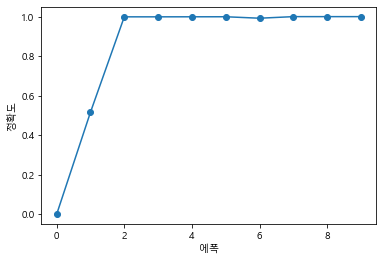

In [11]:
# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(-0.05, 1.05)
plt.show()

###  어텐션 시각화

[[14 11 12 21 20 15 16 21 15  8 36]]


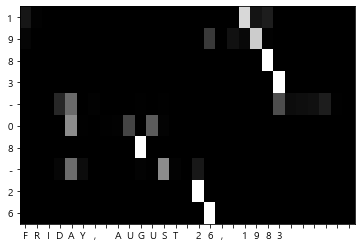

[[14 11 12 12 21 15 11  8 15 11 11]]


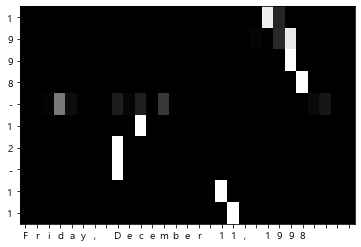

[[14  8 16 16 16 15 16  9 15 11  9]]


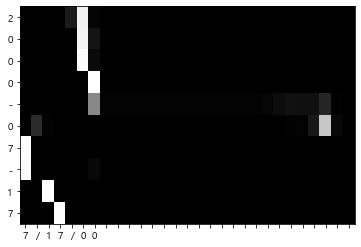

[[14 11 12 21  8 15 16 13 15 11 20]]


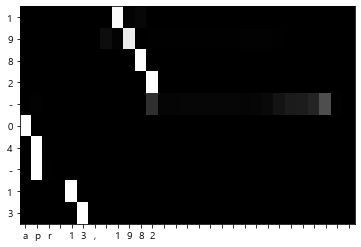

[[14 11 12 21 20 15 16 11 15 11 16]]


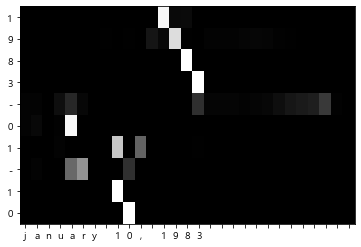

In [11]:
# import matplotlib.pyplot as plt
# from dataset import sequence
# from nn_layers import Softmax, Adam ,Trainer ,TimeEmbedding ,TimeSoftmaxWithLoss,TimeLSTM,TimeAffine
# from nn_layers import eval_seq2seq,Seq2seq ,PeekySeq2seq

(x_train, t_train), (x_test, t_test) = \
    sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
model.load_params()
# print(len(model.params))

_idx = 0
def visualize(attention_map, row_labels, column_labels):
    fig, ax = plt.subplots()
    ax.pcolor(attention_map, cmap=plt.cm.Greys_r, vmin=0.0, vmax=1.0)

    ax.patch.set_facecolor('black')
    ax.set_yticks(np.arange(attention_map.shape[0])+0.5, minor=False)
    ax.set_xticks(np.arange(attention_map.shape[1])+0.5, minor=False)
    ax.invert_yaxis()
    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)

    global _idx
    _idx += 1
    plt.show()


np.random.seed(1984)
for _ in range(5):
    idx = [np.random.randint(0, len(x_test))]
    x = x_test[idx]
    t = t_test[idx]
    print(t)
    model.forward(x, t)
    d = model.decoder.attention.attention_weights
    d = np.array(d)

    attention_map = d.reshape(d.shape[0], d.shape[2])

    # 출력하기 위해 반전
    attention_map = attention_map[:,::-1]
    x = x[:,::-1]

    row_labels = [id_to_char[i] for i in x[0]]
    column_labels = [id_to_char[i] for i in t[0]]
    column_labels = column_labels[1:]

    visualize(attention_map, row_labels, column_labels)


### Bidirectional LSTM  : 양방향 LSTM  , 순향(오른쪽 방향) LSTM 과  역방향(왼쪽방향) LSTM
단어의 순서를 좌우 양쪽 방향으로 두 가지로 처리하여 정보를 집약한다

In [12]:
class TimeBiLSTM:
    def __init__(self, Wx1, Wh1, b1,
                 Wx2, Wh2, b2, stateful=False):
        self.forward_lstm = TimeLSTM(Wx1, Wh1, b1, stateful)
        self.backward_lstm = TimeLSTM(Wx2, Wh2, b2, stateful)
        self.params = self.forward_lstm.params + self.backward_lstm.params
        self.grads = self.forward_lstm.grads + self.backward_lstm.grads

    def forward(self, xs):
        o1 = self.forward_lstm.forward(xs)            # 순방향 LSTM
        o2 = self.backward_lstm.forward(xs[:, ::-1])  # 역방향 LSTM , xs의 순서를 거꾸로 해서 입력
        o2 = o2[:, ::-1]                              # 출력 벡터의 순서를 다시 반대로 바꾼다
        
        out = np.concatenate((o1, o2), axis=2)        # 두개를 합하여 반환한다 , Decoder로 보내서 사용한다
        return out

    def backward(self, dhs):
        H = dhs.shape[2] // 2
        do1 = dhs[:, :, :H]        # concatenate의 역전파
        do2 = dhs[:, :, H:]

        dxs1 = self.forward_lstm.backward(do1)  # 순방향 LSTM의 역전파
        do2 = do2[:, ::-1]                      # 순서를 거꾸로
        dxs2 = self.backward_lstm.backward(do2) # 역방향 LSTM의 역전파
        dxs2 = dxs2[:, ::-1]                    # 순서를 거꾸로
        dxs = dxs1 + dxs2                       # 순전파에 repeat가 사용되었으므로 합한다
        return dxs

## GRU(Gated Recurrent Unit)
https://excelsior-cjh.tistory.com/185

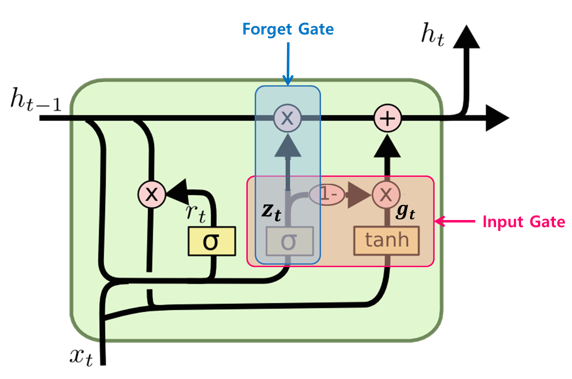

In [ ]:
class GRU:
    def __init__(self, Wx, Wh):
        '''

        Parameters
        ----------
        Wx: 입력 x에 대한 가중치 매개변수(3개 분의 가중치가 담겨 있음)
        Wh: 은닉 상태 h에 대한 가중치 매개변수(3개 분의 가중치가 담겨 있음)
        '''
        self.Wx, self.Wh = Wx, Wh
        self.dWx, self.dWh = None, None
        self.cache = None

    def forward(self, x, h_prev):
        H, H3 = self.Wh.shape
        Wxz, Wxr, Wx = self.Wx[:, :H], self.Wx[:, H:2 * H], self.Wx[:, 2 * H:]
        Whz, Whr, Wh = self.Wh[:, :H], self.Wh[:, H:2 * H], self.Wh[:, 2 * H:]

        z = sigmoid(np.dot(x, Wxz) + np.dot(h_prev, Whz))
        r = sigmoid(np.dot(x, Wxr) + np.dot(h_prev, Whr))
        h_hat = np.tanh(np.dot(x, Wx) + np.dot(r*h_prev, Wh))
        h_next = (1-z) * h_prev + z * h_hat

        self.cache = (x, h_prev, z, r, h_hat)

        return h_next

    def backward(self, dh_next):
        H, H3 = self.Wh.shape
        Wxz, Wxr, Wx = self.Wx[:, :H], self.Wx[:, H:2 * H], self.Wx[:, 2 * H:]
        Whz, Whr, Wh = self.Wh[:, :H], self.Wh[:, H:2 * H], self.Wh[:, 2 * H:]
        x, h_prev, z, r, h_hat = self.cache

        dh_hat =dh_next * z
        dh_prev = dh_next * (1-z)

        # tanh
        dt = dh_hat * (1 - h_hat ** 2)
        dWh = np.dot((r * h_prev).T, dt)
        dhr = np.dot(dt, Wh.T)
        dWx = np.dot(x.T, dt)
        dx = np.dot(dt, Wx.T)
        dh_prev += r * dhr

        # update gate(z)
        dz = dh_next * h_hat - dh_next * h_prev
        dt = dz * z * (1-z)
        dWhz = np.dot(h_prev.T, dt)
        dh_prev += np.dot(dt, Whz.T)
        dWxz = np.dot(x.T, dt)
        dx += np.dot(dt, Wxz.T)

        # rest gate(r)
        dr = dhr * h_prev
        dt = dr * r * (1-r)
        dWhr = np.dot(h_prev.T, dt)
        dh_prev += np.dot(dt, Whr.T)
        dWxr = np.dot(x.T, dt)
        dx += np.dot(dt, Wxr.T)

        self.dWx = np.hstack((dWxz, dWxr, dWx))
        self.dWh = np.hstack((dWhz, dWhr, dWh))

        return dx, dh_prev

In [1]:
class TimeGRU:
    def __init__(self, Wx, Wh, stateful=False):
        self.Wx, self.Wh = Wx, Wh
        selfdWx, self.dWh = None, None
        self.layers = None
        self.h, self.dh = None, None
        self.stateful = stateful

    def forward(self, xs):
        N, T, D = xs.shape
        H, H3 = self.Wh.shape

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = GRU(self.Wx, self.Wh)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        N, T, H = dhs.shape
        D = self.Wx.shape[0]

        dxs = np.empty((N, T, D), dtype='f')
        self.dWx, self.dWh = 0, 0

        dh = 0
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh)

            dxs[:, t, :] = dx
            self.dWx += layer.dWx
            self.dWh += layer.dWh

        self.dh = dh
        return dxs

    def set_state(self, h):
        self.h = h

    def reset_state(self):
        self.h = None